<center><h1> Lab 1 : PGM </h1></center>

## Done by :Ahmed BEJAOUI

### A few tactical imports and configurations


In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# to embed figures in the notebook
%matplotlib inline
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Question 0

<div class="alert alert-success">
    In many practical applications, we often need to compute s = log
PI
$s = log\sum_{i=1}^{I} \exp^{v_i} $, where each $v_i$ < 0 and $|v_i|$ is very large.
. Derive (mathematically) and implement a numerically stable algorithm for computing '$s = log\sum_{i=1}^{I} \exp^{v_i} $, where v is a vector of numbers. Explain why it should work. Test your algorithm on log(sum(expf-1234, -1235g)).


**calcul**

$s = log\sum_{i=1}^{I} \exp^{v_i} $, where each $v_i$ < 0 and $|v_i|$ is very large.
 <br> We define $v_{max}$ as  $ v_{max} = \max_{i} v_i $

Then, we can write : 

$\begin{align*} 
s&=log\sum_{i=1}^{I} exp^{v_i} \\
 &= log(\sum_{i} exp^{v_i - v_{max} + v_{max}})\\
&=\log(\exp^{v_{max}}\sum\limits_{i=1}^n\exp^{(v_i-v_{max})})\\
 &=\ v_{max} + log(\sum_{i} exp^{v_i - v_{max}})
\end{align*}$
<br>
There $\exists$ i0 $\in [1,2,..,l]$ where $ v_{i0} = v_{max}$, then we have $\sum\limits_{i=1}^n\exp^{(v_i-v_{max})} \geq  1$,so when we pass the log, we have  a numerically stable algorithm to compute s

In [2]:
def logsumexp(v):
    return max(v)+np.log(np.sum(np.exp(v-max(v))))

In [3]:
v=np.array([-1234,-1235])
print("the numerical stable computation"+str(logsumexp(v)))
print("the naive computation"+str(np.log(np.sum(np.exp(v)))))


    

the numerical stable computation-1233.6867383124818
the naive computation-inf


/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


**Interpretation**
<br>
As we can see here the logsumexp give us a numerical stable method to compute the log of the sum of expanantial 


## Question 1

<div class="alert alert-success">
Choose the appropriate random variables, define their domains, write down the generative model and draw the
associated directed graphical model.

We define 2 random variable 
- $X_{t}$= The true position of the robot ( the latent state ) at step t
<br>$X_{t} \in \{1,,N\}$ where N is the numbre of possible location 
- $Y_{t}$= The observed position of the robot ( the observation ) at step t
<br>$Y_{t} \in \{1,,N\}$
<br>
We have 
- $X_{t}|X_{t-1} \sim P(X_{t}|X_{t-1})$ the transition model
- $Y_{t}|X_{t} \sim P(Y_{t}|X_{t})$ the observation model

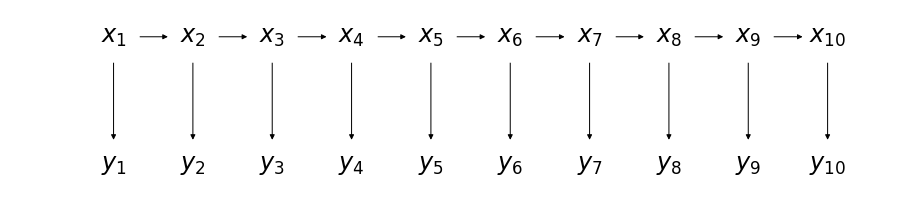

In [4]:
def makeDBN(inter, intra, T, labels):
    """Unfold a graph for T time slices"""
    N = max(max([i for i,j in inter]),max([j for i,j in inter]))+1

    G = np.zeros((N*T,N*T))
    pos = []
    all_labels = []
    for n in range(N):
        pos.append((0,-n))
        all_labels.append('$'+labels[n]+'_{'+str(0+1)+"}"+'$')
        
    for e in inter:
        s,d = e
        G[s,d] = 1

    for t in range(1,T):
        for n in range(N):
            pos.append((t,-n))
            all_labels.append('$'+labels[n]+'_{'+str(t+1)+"}"+'$')

        for e in inter:
            s,d = e
            s = s + N*t
            d = d + N*t
            G[s,d] = 1
        
        for e in intra:
            s,d = e
            s = s + N*(t-1)
            d = d + N*t
            G[s,d] = 1
    return G,pos,all_labels


inter = [(0,1)]
intra = [(0,0)]
variable_names = ["x", "y"] 
T = 10

A, pos, label_list = makeDBN(inter, intra, T, variable_names)

G = nx.DiGraph(A)
labels = {i: s for i,s in enumerate(label_list)}
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, node_color="white", node_size=2500, labels=labels, font_size=24, arrows=True)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

## Question 2

First we define epsilon as $\epsilon=$  the probability that the robot stays where it at each step k

</br>
The transition model is $x_k \sim p(x_k |x_{k-1})$  
$$\quad
P(X_{t+1}|X_{t})=A=
\begin{bmatrix} 
\epsilon & 1-\epsilon & 0 & . & . & . & 0 \\
0 & \epsilon & 1-\epsilon & . & . & . & 0 \\
0 & 0 & \epsilon & 1-\epsilon & . & . & 0 \\
0 & 0 & 0 & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&1-\epsilon\\
1-\epsilon & . &.&.&0 & 0&\epsilon
\end{bmatrix} \in R^{NxN}$$
where $A_{i,j}=p(X_t=i|X_{t-1}=j) \forall i,j$ 
</br>

We define also w by the probability that the robot can observe its true position at step k
</br>

The observation model is $y_k \sim p(y_k |x_{k})$  

</br>
$$\quad
P(Y_{t}|X_{t})=C=
\begin{bmatrix} 
\omega+\frac{1-\omega}{n} & \frac{1-\omega}{n} & \frac{1-\omega}{n} & . & . & . & \frac{1-\omega}{n} \\
\frac{1-\omega}{n} & \omega+\frac{1-\omega}{n} & \frac{1-\omega}{n} & . & . & . & \frac{1-\omega}{n} \\
\frac{1-\omega}{n} &\frac{1-\omega}{n} & 1+\frac{1-\omega}{n} & 0 & . & . & \frac{1-\omega}{n} \\
\frac{1-\omega}{n} & \frac{1-\omega}{n} &\frac{1-\omega}{n} & \omega+\frac{1-\omega}{n}  & . & . & \frac{1-\omega}{n}\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
\frac{1-\omega}{n} & . &.&.&0&\frac{1-\omega}{n}&\omega+\frac{1-\omega}{n}
\end{bmatrix} \in R^{NxN}$$
where $c_{i,j}=p(Y_t=i|X_{t}=j) \forall i,j$ 

We could Write $P(Y_{t}|X_{t}) $as
$$P(Y_{t}|X_{t})=C=\omega* I_N +\frac{1-\omega}{N}*u_N  $$
where 

$$\quad
u_N=\begin{bmatrix} 
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 & 1 & . & . & . & 1 \\
\end{bmatrix} and 
 I_N=\begin{bmatrix} 
1 & 0 & 0 & . & . & . & 0 \\
0 & 1 & 0 & . & . & . & 0 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
0 & 0 & 0 & . & . & . & 1 \\
\end{bmatrix}
$$

## Question 3

<div class="alert alert-success">

3. Specify the following verbal statements in terms of posterior quantities using mathematical notation. For example
\the distribution of the robot's location two time steps later given its current position at time k" should be
answered as p(xk+2jxk).
(a) Distribution of the robot's current position given the observations so far,
(b) Distribution of the robot's position at time step k given all the observations,
(c) Distribution of the robot's next position given the observations so far,
(d) Distribution of the robot's next sensor reading given the observations so far,
(e) Distribution of the robot's initial position given observations so far,
(f) Most likely current position of the robot given the observations so far,
(g) Most likely trajectory taken by the robot from the start until now given the observations so far.

<br>
<h5>(a)Distribution of the robot's current position given the observations so far,</h5>
$P(X_k|Y_{1:k})$
</br>
<br>
<h5>(b) Distribution of the robot's position at time step k given all the observations</h5>
$P(X_k|Y_{1:K})$

</br>
<br>
<h5>(c) Distribution of the robot's next position given the observations so far,</h5>
$P(X_{k+1}|Y_{1:k})$
</br>

<br>
<h5>(d) Distribution of the robot's next sensor reading given the observations so far,</h5>
$P(Y_{k+1}|Y_{1:k})$

</br>

<br>
<h5>(e) Distribution of the robot's initial position given observations so far,</h5>
$P(X_1|Y_{1:k})$

</br>

<br>
<h5>(f) Most likely current position of the robot given the observations so far,</h5>
$\arg\max_{X_k} P(X_k|Y_{1:k})$
</br>

<br>
<h5>(g) Most likely trajectory taken by the robot from the start until now given the observations so far.</h5>
$\arg\max_{X_1,...,X_k} P(X_{1:k}|Y_{1:k})$

</br>


## Question 4

In [5]:
def matrix_A(N,eps):
    A=np.eye(N)*eps
    A[N-1,0]=1-eps
    for i in range(N-1):
        A[i,i+1]=1-eps
    return A
        
def matrix_C(N,w):
    return w*np.eye(N)+(1-w)/N*np.full((N,N), 1)

In [6]:
def simulate(A,C,K):

 
    state=np.zeros(K,dtype=int)
    obs=np.zeros(K,dtype=int)
    for k in range(K):
        if (k==0):
            state[k]=np.random.choice(np.arange(0, N), p=prior)
        else:
            state[k]=np.random.choice(np.arange(0, N), p=A[:,state[k-1]])
        obs[k]=int(np.random.choice(np.arange(0, N), p=C[:,state[k]]))
#     return obs,
    return obs,state



In [7]:
#initialisation

K=100
N=50
eps=0.3
w=0.8
A=matrix_A(N,eps)
C=matrix_C(N,w)
prior=np.ones(N)/N
obs,state=simulate(A,C,K)

In [8]:
for i in range(K):
    print("At step "+str(i))
    print('\nThe true position of the robot is :'+str(state[i]))
    print('The observed position is :'+str(int(obs[i])))
    print('-------------------------------------------------------------------------------\n')

At step 0

The true position of the robot is :22
The observed position is :22
-------------------------------------------------------------------------------

At step 1

The true position of the robot is :21
The observed position is :21
-------------------------------------------------------------------------------

At step 2

The true position of the robot is :20
The observed position is :9
-------------------------------------------------------------------------------

At step 3

The true position of the robot is :19
The observed position is :19
-------------------------------------------------------------------------------

At step 4

The true position of the robot is :18
The observed position is :18
-------------------------------------------------------------------------------

At step 5

The true position of the robot is :17
The observed position is :17
-------------------------------------------------------------------------------

At step 6

The true position of the robot is :1

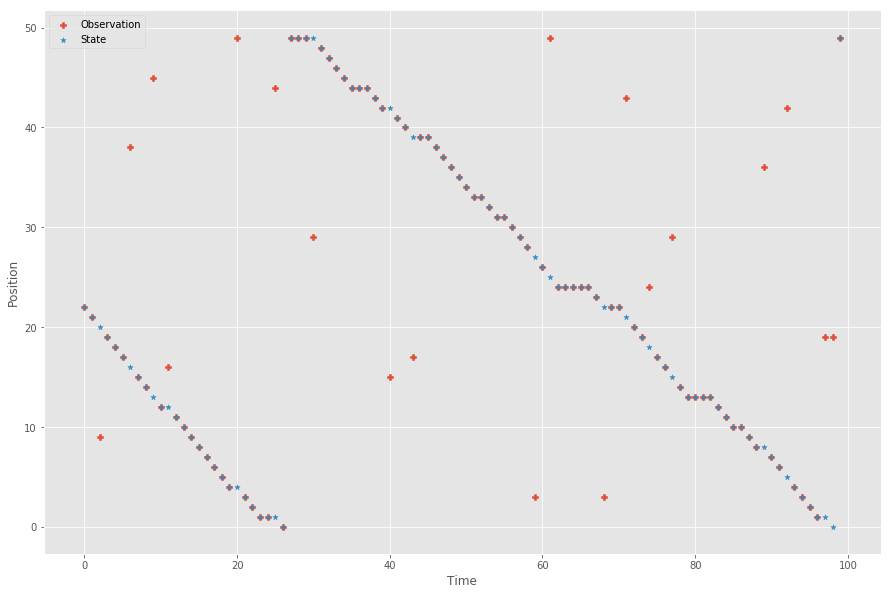

In [9]:
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(np.arange(K),obs,label='Observation',s=30,marker='P')
plt.scatter(np.arange(K),state,label='State',marker='*',s=30)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

**Interpretation**
<br>
as we can see here the robot can only stay to his current poisition or moves to the next point in counter-clock direction.and sometimes the sensors make error while detecting the true position of the robot( some observartions are different from state)

### Question 5

In [10]:
#initialisation
K=100
N=50
eps=0.3
w=0.8
current_step=10
A=matrix_A(N,eps)  
C=matrix_C(N,w)

In [11]:
def forward_b(A,C,K,N):
    
# ----------------------------------------------------------------------------
#                                  initialisation    
    y,state=simulate(A,C,K) 
    log_alpha=np.zeros([N,K])
    log_alpha_predict=np.zeros([N,K])
    log_beta=np.zeros([N,K])
    log_beta_postdict=np.zeros([N,K])

    prior=np.ones(N)/N
# ----------------------------------------------------------------------------
#                                  forward    

    for k in range(K):
        if (k==0):
            log_alpha_predict[:,k]=np.log(prior)
        else:
#           log_alpha_predict[:,k]=calculate alpha(k,k-1)
            log_alpha_predict[:,k]=state_predict(A,log_alpha[:,k-1])
#           gives log(A*alpha)
       
#       log_alpha[:,k]=calculate alpha(k,k)
        log_alpha[:,k]=state_update(C[int(y[k]),:],log_alpha_predict[:,k])
    
# ----------------------------------------------------------------------------
#                                  Backward
    for t in range (K-1,-1,-1):    
#       log_alpha_predict[:,k]=calculate alpha(k,k-1)
        if (t==K-1):
            log_beta_postdict[:,t]=np.zeros(N)
        else:

            log_beta_postdict[:,t]=state_postdict(A,log_beta[:,t+1])
#       gives log(A'*beta)

#       log_beta[:,t]=calculate beta(k,k)
        log_beta[:,t]=state_update(C[int(y[t]),:],log_beta_postdict[:,t])



    return log_alpha,log_alpha_predict,log_beta,log_beta_postdict

              
    

    
              

In [12]:
def state_predict(A,log_p):
    mx=max(log_p)
    p=np.exp(log_p-mx)
    lap=np.log(A.dot(p))+mx
    return lap

In [13]:
def state_update(obs,log_p):
    return np.log(obs)+log_p

In [14]:
def state_postdict(A,log_p):
    mx=max(log_p)
    p=np.exp(log_p-mx)
    lap=np.log(A.T.dot(p))+mx
    return lap


**3.a**  The Distribution of the robot's current position given the observations so far is given by 

</br>
$P(X_k|Y_{1:k})= \frac{P(X_k,Y_{1:k})}{P(Y_{1:k})}=\frac{P(X_k,Y_{1:k})}{\sum\nolimits_{X_k}P(X_k,Y_{1:k})}=\frac{\alpha_{k,k}(X_k)}{\sum\limits_{i=1}^k \alpha_{k,k}(X_k) } $

</br>

**3.b** The Distribution of the robot's position at time step k given all the observations is given by

</br> 

$P(X_k|Y_{1:K})= \frac{P(X_k,Y_{1:K})}{P(Y_{1:K})} $

</br>

or $P(X_k,Y_{1:K})=P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k,,Y_{1:k})=P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k)$ because       $y_{k+1:K} \coprod y_{1:k} | X_{k}  $

</br>

Then
$P(X_k,Y_{1:K})=P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k)=\alpha_{k/k}(x_k).\beta_{k/k+1}(x_k)=\gamma_{k,k}(X_k) $

</br>

Finally $P(X_k|Y_{1:K})=\frac{\gamma_{k,k}(X_k)}{\sum\nolimits_{X_k} \gamma_{k,k}(X_k) } $

</br>

**3.f** The most likely current position of the robot given the observations so far is given by

ML_pos= $\arg\max_{X_k} P(X_k|Y_{1:k})$

In [15]:
def calcul_prob(A,C,K,N,current_step):
    log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_b(A,C,K,N)
#   (a) Distribution of the robot's current position given the observations so far,
    p3a=np.exp(log_alpha[:,current_step-1])/((np.exp(log_alpha[:,:current_step])).sum(axis=1))
#   (b) Distribution of the robot's position at time step k given all the observations,
    log_gamma=log_alpha+log_beta_postdict
    p3b=np.exp(log_gamma[:,current_step])/((np.exp(log_gamma)).sum(axis=1))
#   (f) Most likely current position of the robot given the observations so far,
    m_likely_pos=np.argmax(p3a)+1
    return p3a,p3b,m_likely_pos
    
    

    

In [16]:
log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_b(A,C,K,N)
p3a,p3b,m_likely_pos=calcul_prob(A,C,K,N,current_step)


In [17]:
print ("At step k="+str(current_step))
print("The distribution of the robot's current position given the observations so far is ")
print(p3a)
print('-------------------------------------------------------------------------------\n')
print("The distribution of the robot's position at time step k given all the observations is")
print(p3b)
print('-------------------------------------------------------------------------------\n')
print("the most likely current position of the robot given the observations so far is")
print(m_likely_pos)

At step k=10
The distribution of the robot's current position given the observations so far is 
[6.57404463e-14 1.52085086e-18 3.51439328e-21 1.89124939e-24
 2.61095424e-22 6.40461853e-21 1.60587263e-20 1.71871285e-20
 9.93311431e-21 3.36995864e-21 9.57050464e-21 1.91056227e-20
 1.63811269e-20 7.16968034e-21 1.74150648e-21 3.87987780e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.61095424e-22 2.61095424e-22 2.61095424e-22 2.61095424e-22
 2.36832385e-21 3.72835396e-17 9.71348342e-15 6.81763658e-06
 1.46091365e-08 3.13003842e-11]
-------------------------------------------------------------------------------

The distribution of the robot's position at time step k giv

## Question 6

We introduce k as the probability that the robot can be kidnapped at each step t

</br>

The transition model is $x_k \sim p(x_k |x_{k-1})$ will change . It will become
$$\quad
P(X_{t+1}|X_{t})=
\begin{bmatrix} 
(1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & \frac{k}{N} & . & . & . & (1-k)(1-\epsilon)+\frac{k}{N} \\
 \frac{k}{N} & (1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & . & . & \frac{k}{N} \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
(1-k).(1-\epsilon)+\frac{k}{N} & . &.&.&\frac{k}{N}& \frac{k}{N} &(1-k).\epsilon+\frac{k}{N}
\end{bmatrix}$$=$$\quad
P(X_{t+1}|X_{t})=(1-k)*
\begin{bmatrix} 
\epsilon & 1-\epsilon & 0 & . & . & . & 0 \\
0 & \epsilon & 1-\epsilon & . & . & . & 0 \\
0 & 0 & \epsilon & 1-\epsilon & . & . & 0 \\
0 & 0 & 0 & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&1-\epsilon\\
1-\epsilon & . &.&.&0 & 0&\epsilon
\end{bmatrix}+\frac{k}{N}*\begin{bmatrix} 
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 & 1 & . & . & . & 1 \\
\end{bmatrix}
$$
The observation model  $y_k \sim p(y_k |x_{k})$  remains the same as question 2 
$$P(Y_{t}|X_{t})=\omega* I_N +\frac{1-\omega}{N}*u_N  $$

</br>
we can use the same code by only changing that the transation matrix A


In [18]:
def matrix_A_kinnaped(N,eps,k):
    A=matrix_A(N,eps)
    return (1-k)*A+(k)/N*np.full((N,N), 1)
        
def matrix_C_kinnaped(N,w):
    return w*np.eye(N)+(1-w)/N*np.full((N,N), 1)

In [19]:
#initialisation
K=100
N=50
eps=0.3
w=0.8
current_step=10
prob_k=0.1
A_kinnaped=matrix_A_kinnaped(N,eps,prob_k)
C_kinnaped=matrix_C_kinnaped(N,w)

In [20]:
obs,state=simulate(A_kinnaped,C_kinnaped,K)
for i in range(K):
    print("At step "+str(i))
    print('\nThe true position of the robot is :'+str(state[i]))
    print('The observed position is :'+str(int(obs[i])))
    print('-------------------------------------------------------------------------------\n')

At step 0

The true position of the robot is :31
The observed position is :31
-------------------------------------------------------------------------------

At step 1

The true position of the robot is :31
The observed position is :27
-------------------------------------------------------------------------------

At step 2

The true position of the robot is :30
The observed position is :30
-------------------------------------------------------------------------------

At step 3

The true position of the robot is :29
The observed position is :29
-------------------------------------------------------------------------------

At step 4

The true position of the robot is :29
The observed position is :29
-------------------------------------------------------------------------------

At step 5

The true position of the robot is :29
The observed position is :29
-------------------------------------------------------------------------------

At step 6

The true position of the robot is :

In [21]:
log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_b(A_kinnaped,C_kinnaped,K,N)
p3a,p3b,m_likely_pos=calcul_prob(A_kinnaped,C_kinnaped,K,N,current_step)
print ("At step k="+str(current_step))
print("The distribution of the robot's current position given the observations so far is ")
print(p3a)
print('-------------------------------------------------------------------------------\n')
print("The distribution of the robot's position at time step k given all the observations is")
print(p3b)
print('-------------------------------------------------------------------------------\n')
print("the most likely current position of the robot given the observations so far is")
print(m_likely_pos)

At step k=10
The distribution of the robot's current position given the observations so far is 
[1.49177320e-10 1.49177320e-10 1.49177320e-10 1.49177320e-10
 1.49177320e-10 1.49177320e-10 1.49177320e-10 1.49177320e-10
 1.49177320e-10 1.49177320e-10 1.49177320e-10 1.49177320e-10
 1.49177320e-10 1.49177320e-10 1.49177319e-10 1.49176843e-10
 1.48988544e-10 9.93022272e-11 7.45541792e-13 1.49177320e-10
 1.49177320e-10 1.49177320e-10 1.49177320e-10 2.99846405e-08
 1.49177320e-10 1.49177368e-10 1.49177422e-10 1.49177408e-10
 1.49177357e-10 1.49177151e-10 1.49107241e-10 1.49177320e-10
 1.49177320e-10 1.49177320e-10 1.49177320e-10 1.49177320e-10
 1.49177320e-10 1.49177320e-10 1.49177320e-10 1.49177320e-10
 1.49177395e-10 1.51809421e-10 4.66649149e-08 2.01820068e-08
 1.91301278e-10 1.49020536e-10 1.15574849e-10 9.48891733e-11
 7.05357468e-11 1.49177320e-10]
-------------------------------------------------------------------------------

The distribution of the robot's position at time step k giv

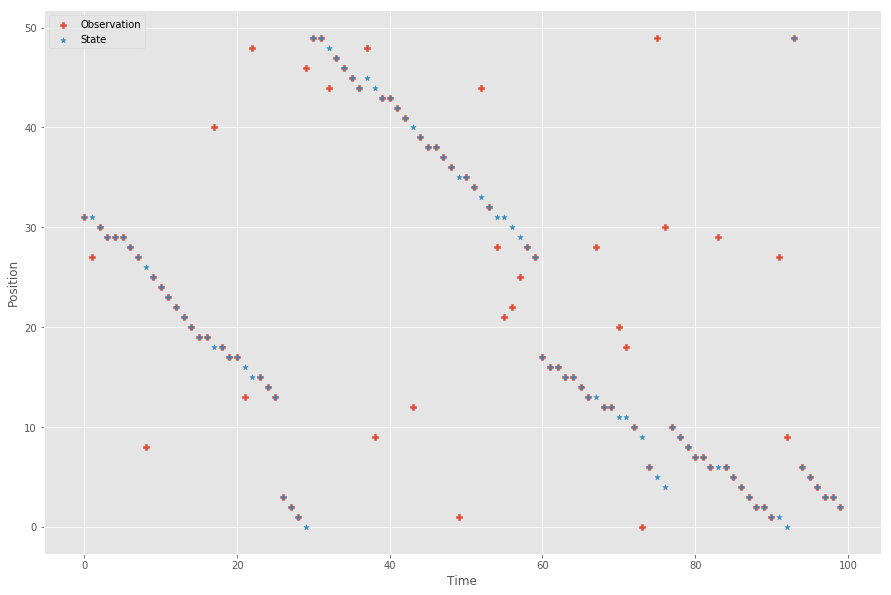

In [22]:
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(np.arange(K),obs,label='Observation',s=30,marker='P')
plt.scatter(np.arange(K),state,label='State',marker='*',s=30)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

**Interpretation**
<br>
As we can see here the robot can jump to any position.and the sensors is still making some errors while detecting the true position of the robot (some observartions are different from state)